# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [90]:
import math
import sys

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [92]:
# YOUR CODE HERE
data_url = (
    "https://github.com/EpistasisLab/pmlb/raw/master/datasets/"
    "wine_quality_white/wine_quality_white.tsv.gz"
)

df = pd.read_csv(data_url, sep="\t", compression="gzip")


In [93]:
print("Dataset shape:", df.shape)

Dataset shape: (4898, 12)


In [94]:
print("Columns:", df.columns.tolist())

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


In [95]:
df.sample(n=10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
4632,6.3,0.30,0.91,8.20,0.034,50.0,199.0,0.99394,3.39,0.49,11.700000,6
2244,7.0,0.36,0.14,11.60,0.043,35.0,228.0,0.99770,3.13,0.51,8.900000,5
1924,7.6,0.26,0.36,1.60,0.032,6.0,106.0,0.99300,3.15,0.40,10.400000,4
3801,8.3,0.18,0.30,1.10,0.033,20.0,57.0,0.99109,3.02,0.51,11.000000,6
2634,8.7,0.31,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.700000,5


YOUR ANSWERS HERE

For this project I chose the Wine Quality (white) dataset from PMLB.
It has 4,898 rows and 12 columns.

The columns include several physicochemical measures of the wine (for example acidity, sugar, sulphates, alcohol, etc.) and one target column called target, which is the quality score given by human tasters (from 0 to 10, in practice between 3 and 9)

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [96]:
# YOUR CODE HERE

# all columns
print("Columns:", df.columns.tolist())


Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


In [97]:
# data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


YOUR ANSWERS HERE

The dataset consists of 4,898 instances of white wine samples.
* fixed acidity: Represents the non-volatile acids (tartaric). Fundamental for wine structure; too low makes it flat.
* volatile acidity: The measure of acetic acid. High levels lead to an unpleasant vinegar taste (wine fault).
* citric acid: Added for "freshness" and flavor, acts as a preservative.
* residual sugar: The sugar remaining after fermentation stops. Determines if the wine is dry, semi-dry, or sweet.
* chlorides: The amount of salt. Excess saltiness is undesirable.
* free sulfur dioxide: prevents microbial growth and oxidation.
* total sulfur dioxide: Total amount of SO2. Too much is detectable by nose and regulated by law.
* density: Depends on the percent alcohol and sugar content.
* pH: Describes how acidic or basic the wine is (usually 2.9–3.3 for whites). Affects stability.
* sulphates: Additive contributing to SO2 levels, acts as antimicrobial.
* alcohol: The percent alcohol content. Usually, higher alcohol in balanced wines correlates with body/quality.
* target (quality): The output variable. A sensory score between 0 and 10. Since it is an integer, this behaves somewhat like a classification problem, though we treat it as regression here.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

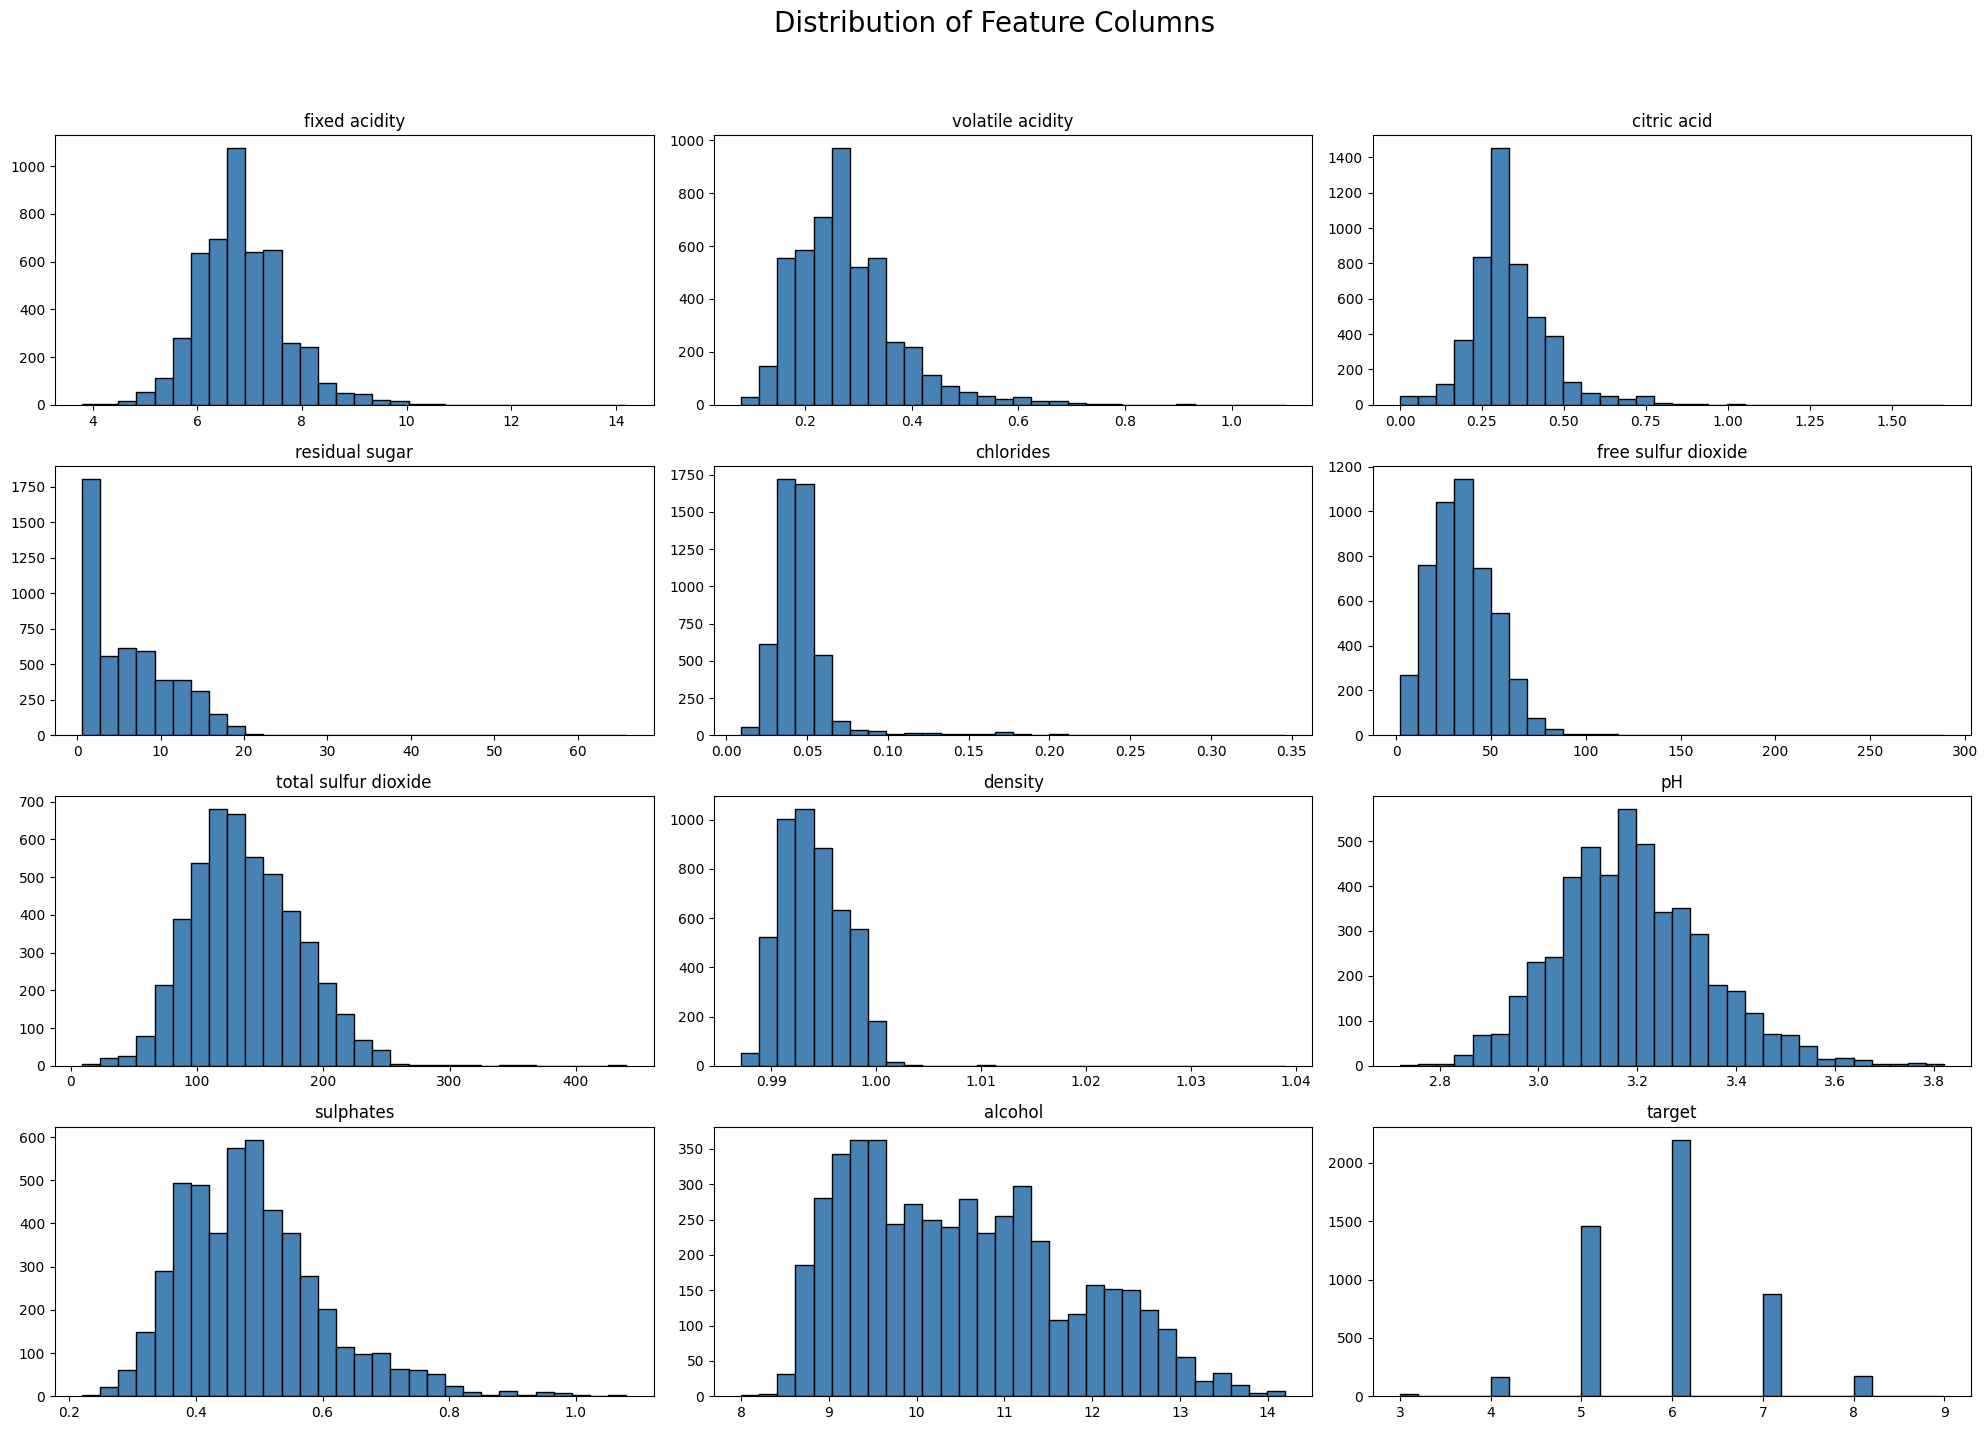

In [98]:
# YOUR CODE HERE
df.hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black', grid=False)
plt.suptitle("Distribution of Feature Columns", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

YOUR ANSWERS HERE

* fixed acidity, total sulfur dioxide, pH: These appear to be Normal (Gaussian) Distributions. They are bell-shaped and symmetric around the mean.
volatile acidity, citric acid, free sulfur dioxide, sulphates, alcohol: These are Positively Skewed (Right-Skewed) distributions. The tail extends towards higher values.
* residual sugar, chlorides, density: These show a Heavy-Tailed or Log-Normal distribution. Most values are clustered at the low end with extreme outliers to the right.
* target: This is a Discrete / Multimodal distribution. Since the values are integers, it does not follow a continuous probability density function. It looks roughly normal but discretized.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

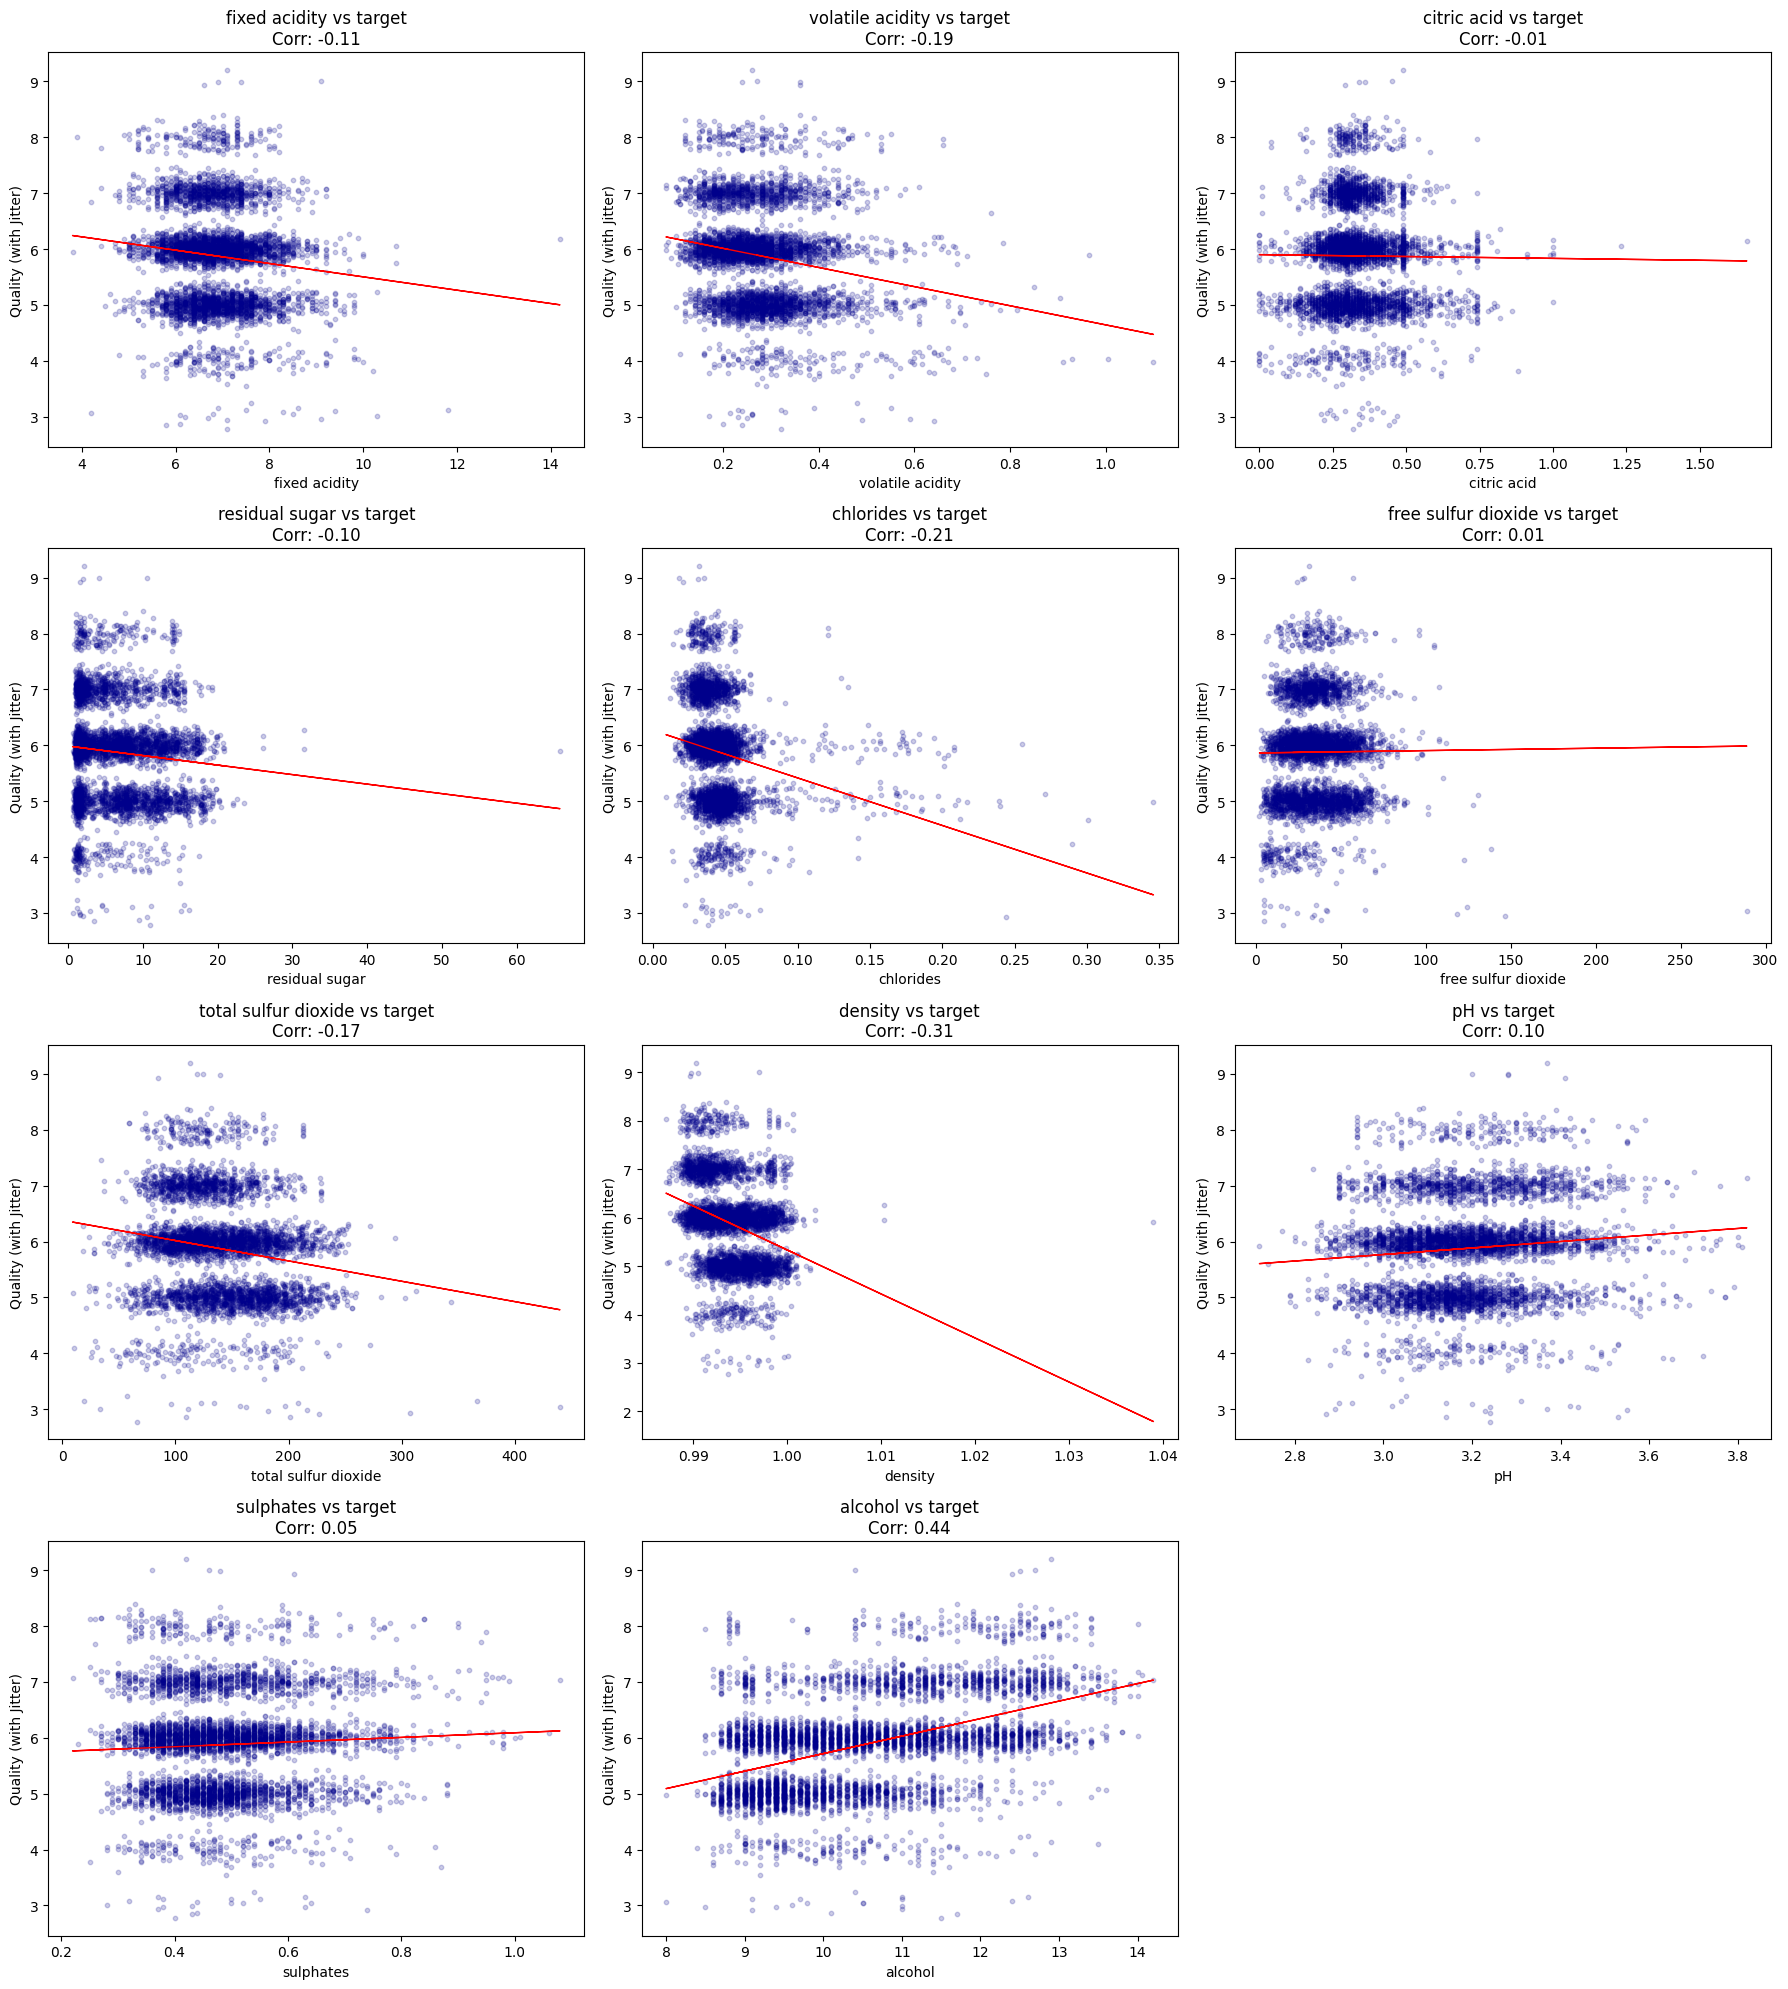

In [99]:
target_col = "target"
input_cols = df.columns.drop(target_col)
y_real = df[target_col]
rng = np.random.default_rng(42)
y_jittered = y_real + rng.normal(0, 0.15, size=len(y_real))

n_cols = 3
n_rows = math.ceil(len(input_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(input_cols):
    ax = axes[i]
    # Calculate correlation
    corr = df[col].corr(y_real)
    
    # plot Y-axis
    ax.scatter(df[col], y_jittered, alpha=0.2, s=10, color='darkblue')
    
    # regression line to dependency
    m, b = np.polyfit(df[col], y_real, 1)
    ax.plot(df[col], m*df[col] + b, color='red', linewidth=1)
    
    ax.set_title(f'{col} vs target\nCorr: {corr:.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel("Quality (with Jitter)")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [100]:
print(df.corr()[target_col].drop(target_col).sort_values(ascending=False))

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: target, dtype: float64


YOUR ANSWERS HERE

Classification of Dependencies:

* Dependent (Not Independent):

    ** Alcohol (Corr: 0.44): Strong positive dependency. As alcohol content increases, the perceived quality consistently increases. The slope is clearly visible.

    ** Density (Corr: -0.31): Negative dependency. Lower density tends to correlate with higher quality (likely related to higher alcohol/lower sugar).

    ** Chlorides & Volatile Acidity: Negative dependency. Higher values generally result in lower quality ratings (likely due to off-flavors).

* Independent (or Weakly Dependent):

    ** Citric acid, Free sulfur dioxide, Sulphates: The regression lines are nearly flat, and the correlation coefficients are very close to zero (< 0.1). Knowing the value of these features gives us very little information about the likely quality score in a linear context.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [101]:
# YOUR CODE HERE

X = df.drop("target", axis=1)
y = df["target"]

ols_model = sklearn.linear_model.LinearRegression()
ols_model.fit(X, y)
predictions = ols_model.predict(X)

mse_full = np.mean((y - predictions) ** 2)
r2_full = ols_model.score(X, y)

print(f"Mean Squared Error (full model): {mse_full:.4f}")
print(f"R2 (full model): {r2_full:.4f}")

Mean Squared Error (full model): 0.5632
R2 (full model): 0.2819


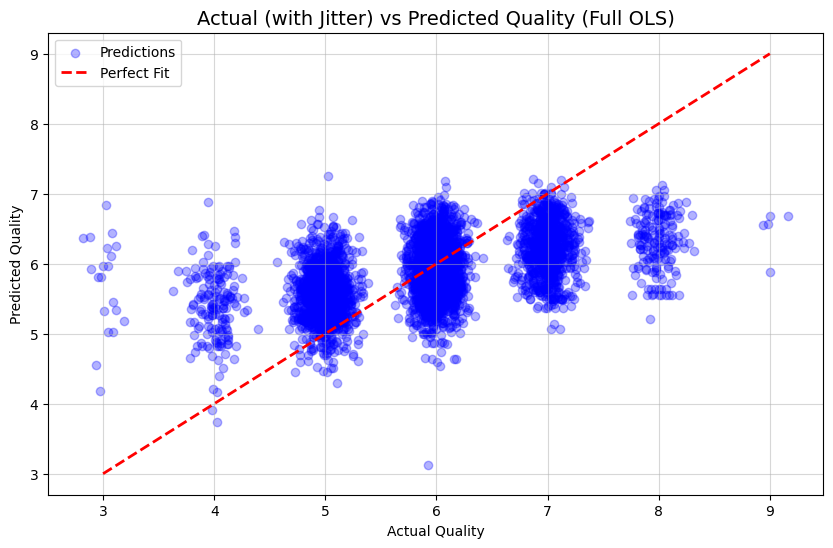

In [102]:
rng = np.random.default_rng(42)
y_jittered = y + rng.normal(0, 0.12, size=len(y))

plt.figure(figsize=(10, 6))
plt.scatter(y_jittered, predictions, alpha=0.3, color='blue', label='Predictions')

min_val = min(y.min(), predictions.min())
max_val = max(y.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2, label='Perfect Fit')

plt.title("Actual (with Jitter) vs Predicted Quality (Full OLS)", fontsize=14)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

YOUR ANSWERS HERE

I built an ordinary least squares (OLS) regression model using all 11 input features.

Model Performance: The Mean Squared Error (MSE) is 0.5632, and the R**2 is 0.2819. This indicates that the model explains about 28% of the variance in wine quality, which is moderate but leaves room for improvement (likely via non-linear models).

Visual Analysis: The plot compares actual vs. predicted values (using jitter on the actual values to reveal density). The model tends to be conservative: it overestimates the quality of poor wines (predicting ~5 for actual 3s) and underestimates excellent wines (predicting ~7 for actual 9s). It essentially pulls predictions towards the mean quality.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [103]:
# YOUR CODE HERE
single_feature_results = {}

for col in X.columns:
    X_single = X[[col]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_single, y)
    preds_single = model.predict(X_single)
    mse_single = np.mean((y - preds_single) ** 2)
    single_feature_results[col] = mse_single

best_col, best_mse = min(single_feature_results.items(), key=lambda v: v[1])

print("MSE for each single-feature model:")
for col, col_mse in single_feature_results.items():
    print(f"- {col}: {col_mse:.4f}")

print(f"\nBest single feature: '{best_col}'")
print(f"MSE (best single feature): {best_mse:.4f}")
print(f"MSE (full model from Problem 5): {mse_full:.4f}")

MSE for each single-feature model:
- fixed acidity: 0.7741
- volatile acidity: 0.7545
- citric acid: 0.7841
- residual sugar: 0.7767
- chlorides: 0.7496
- free sulfur dioxide: 0.7841
- total sulfur dioxide: 0.7603
- density: 0.7102
- pH: 0.7764
- sulphates: 0.7819
- alcohol: 0.6354

Best single feature: 'alcohol'
MSE (best single feature): 0.6354
MSE (full model from Problem 5): 0.5632


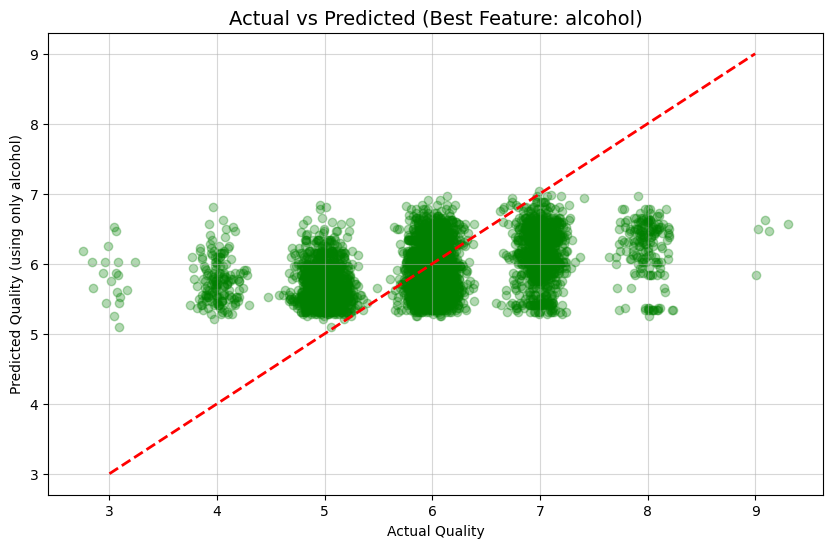

In [104]:
# plot for the best featuree
X_best = X[[best_col]]
best_model = sklearn.linear_model.LinearRegression()
best_model.fit(X_best, y)
best_preds = best_model.predict(X_best)

plt.figure(figsize=(10, 6))
y_jittered = y + rng.normal(0, 0.12, size=len(y))

plt.scatter(y_jittered, best_preds, alpha=0.3, color='green')
plt.plot([min_val, max_val], [min_val, max_val], "r--", linewidth=2)

plt.title(f"Actual vs Predicted (Best Feature: {best_col})", fontsize=14)
plt.xlabel("Actual Quality")
plt.ylabel(f"Predicted Quality (using only {best_col})")
plt.grid(True, alpha=0.5)
plt.show()

YOUR ANSWERS HERE

The single input column that provides the best linear model is Alcohol.

Comparison: The MSE for the Alcohol-only model is 0.6354, whereas the full model (11 features) had an MSE of 0.5632.

Interpretation: While Alcohol is the strongest individual driver of quality (higher alcohol often correlates with better body/ripeness), relying on it alone increases the error. The combination of other features (like volatile acidity and sulphates) provides significant additional information, improving the model's accuracy by about 11%.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

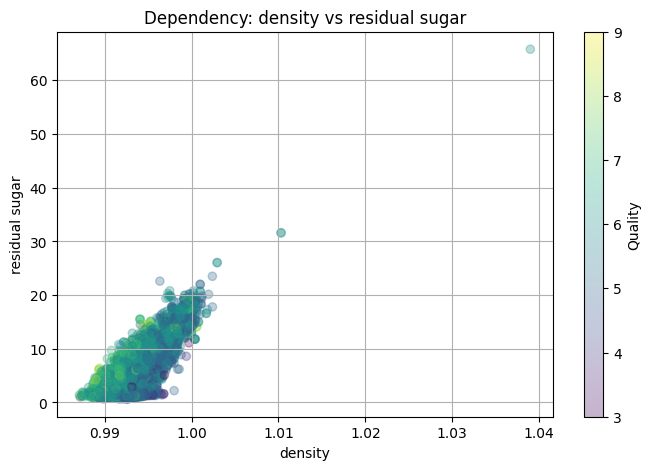

Splitting data at median density: 0.99374


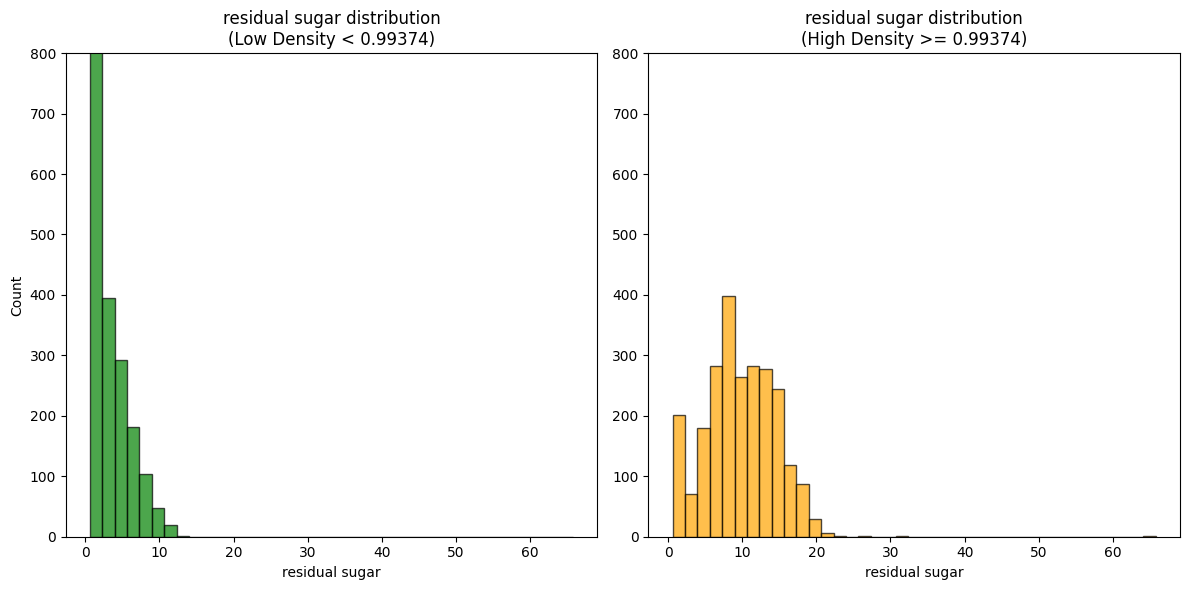

In [105]:
# YOUR CODE HERE
col_x = "density"
col_y = "residual sugar"

# scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df[col_x], df[col_y], alpha=0.3, c=df['target'], cmap='viridis')
plt.colorbar(label='Quality')
plt.title(f"Dependency: {col_x} vs {col_y}")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.grid(True)
plt.show()

#s plit 
threshold = df[col_x].median()
print(f"Splitting data at median {col_x}: {threshold:.5f}")

group_low = df[df[col_x] < threshold][col_y]
group_high = df[df[col_x] >= threshold][col_y]

# histograms
bins = np.linspace(df[col_y].min(), df[col_y].max(), 40)
max_freq = 800 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(group_low, bins=bins, color='green', alpha=0.7, edgecolor='black')
plt.title(f"{col_y} distribution\n(Low Density < {threshold:.5f})")
plt.xlabel(col_y)
plt.ylabel("Count")
plt.ylim(0, max_freq)

plt.subplot(1, 2, 2)
plt.hist(group_high, bins=bins, color='orange', alpha=0.7, edgecolor='black')
plt.title(f"{col_y} distribution\n(High Density >= {threshold:.5f})")
plt.xlabel(col_y)
plt.ylim(0, max_freq)

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

I identified a strong dependency between density and residual sugar (Correlation ~0.84).

The Split: I split the data using the median density (0.99374) as the threshold t.

Visual Evidence: The histograms clearly show the dependency.

**Left Plot (Low Density): The residual sugar is heavily concentrated near 0-5.

**Right Plot (High Density): The distribution of sugar shifts significantly to the right, with many samples having >10 sugar.

Conclusion: This confirms that sugar is a primary driver of density in wine; if you separate wines by density, you get two completely different sugar profiles. They are not independent.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [106]:
# YOUR CODE HERE

# standardize
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

# PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

num_features = X.shape[1]
half_components = num_features // 2

explained_variance = np.sum(pca.explained_variance_ratio_[:half_components])

print(f"Number of features: {num_features}")
print(f"PCs used: {half_components}")
print(f"Variance explained: {explained_variance:.4f} ({explained_variance * 100:.2f}%)")

Number of features: 11
PCs used: 5
Variance explained: 0.7283 (72.83%)


In [107]:
# regression
X_pca_half = X_pca[:, :half_components]

pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(X_pca_half, y)

pca_predictions = pca_model.predict(X_pca_half)
mse_pca = np.mean((y - pca_predictions) ** 2)

print(f"\nMSE (Full OLS): {mse_full:.4f}")
print(f"MSE (PCA - 5 components): {mse_pca:.4f}")


MSE (Full OLS): 0.5632
MSE (PCA - 5 components): 0.6448


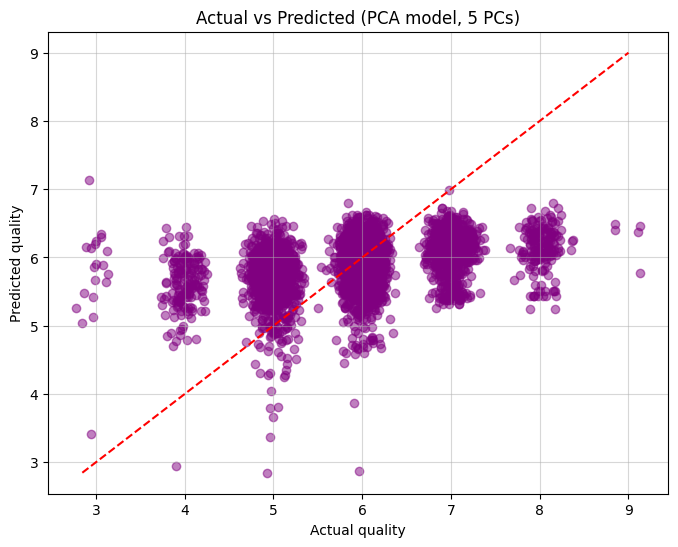

In [108]:
# plot
y_jittered = y + rng.normal(0, 0.12, size=len(y))

plt.figure(figsize=(8, 6))
plt.scatter(y_jittered, pca_predictions, alpha=0.5, color='purple')
plt.title(f"Actual vs Predicted (PCA model, {half_components} PCs)")
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")

min_val = min(y.min(), pca_predictions.min())
max_val = max(y.max(), pca_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.grid(True, alpha=0.5)
plt.show()

YOUR ANSWERS HERE

Explained Variation: The first 5 principal components explain approximately 72.8% of the variance in the input data.

Performance Comparison: The PCA model has an MSE of 0.6448, which is higher (worse) than the full OLS model's MSE of 0.5632.

Conclusion: By discarding the last 6 components (representing ~27% of the variance), we lost information that was valuable for predicting the target. While PCA reduced dimensionality, it removed signal along with the noise in this specific case.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [109]:
# YOUR CODE HERE
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
max_corr_pair = upper.stack().idxmax()
max_corr_val = upper.stack().max()

print(f"Highest correlation pair: {max_corr_pair}")
print(f"Correlation: {max_corr_val:.4f}")

Highest correlation pair: ('residual sugar', 'density')
Correlation: 0.8390


In [110]:
pc1_loadings = pd.Series(pca.components_[0], index=X.columns)
print("\nLoadings for PC1:")
print(pc1_loadings[[max_corr_pair[0], max_corr_pair[1]]])


Loadings for PC1:
residual sugar    0.427408
density           0.511524
dtype: float64


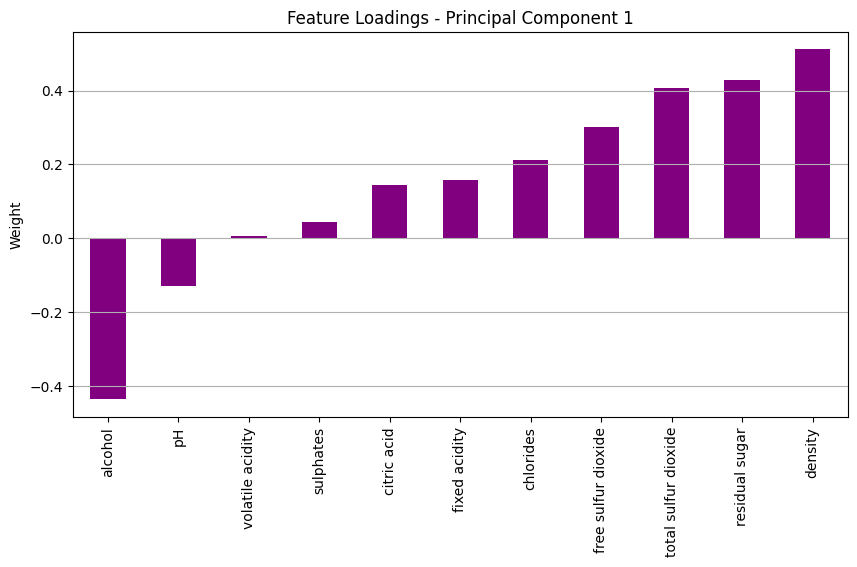

In [111]:
pc1_loadings.sort_values().plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Feature Loadings - Principal Component 1")
plt.ylabel("Weight")
plt.grid(axis='y')
plt.show()

YOUR ANSWERS HERE

The pair with the highest correlation is residual sugar and density (0.839).

Reflection in Principal Components:
This correlation is strongly reflected in Principal Component 1 (PC1). As seen in the loadings plot, both residual sugar and density have high positive weights (approx. 0.43 and 0.51 respectively) in PC1.

This means PC1 effectively captures the shared variance of these two features, treating them as a single underlying factor (likely representing the "body/thickness" of the wine).

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [112]:
# YOUR CODE HERE
residuals = np.abs(y - predictions)
outlier_idx = residuals.idxmax()
outlier_val = residuals.max()

print(f"Outlier Index: {outlier_idx}")
print(f"Residual Error: {outlier_val:.4f}")
print(f"Actual: {y[outlier_idx]}, Predicted: {predictions[outlier_idx]:.4f}")

print("Outlier Row Data:")
print(df.loc[outlier_idx])

Outlier Index: 4745
Residual Error: 3.8348
Actual: 3, Predicted: 6.8348
Outlier Row Data:
fixed acidity             6.10000
volatile acidity          0.26000
citric acid               0.25000
residual sugar            2.90000
chlorides                 0.04700
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   0.99314
pH                        3.44000
sulphates                 0.64000
alcohol                  10.50000
target                    3.00000
Name: 4745, dtype: float64


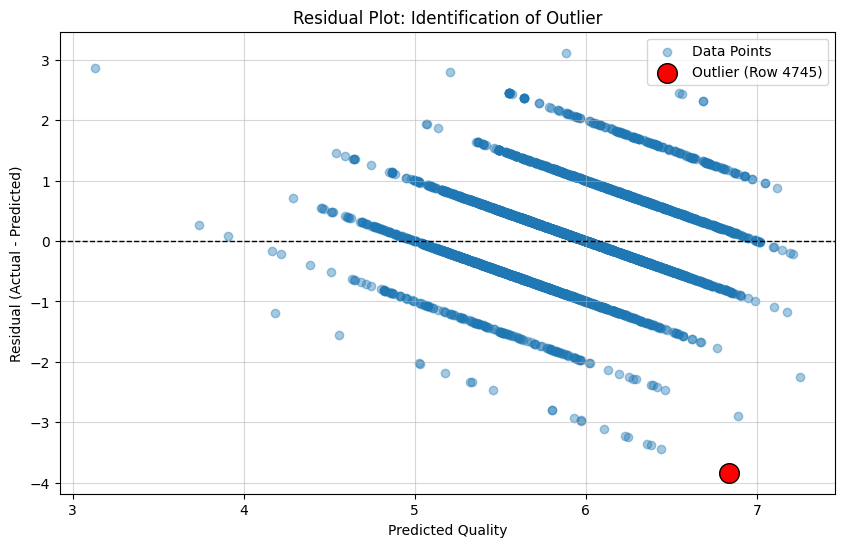

In [113]:
# residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, y - predictions, alpha=0.4, label='Data Points')

#highlight the outlier specifically
plt.scatter(
    predictions[outlier_idx], 
    y[outlier_idx] - predictions[outlier_idx], 
    color='red', s=200, edgecolors='black', zorder=5, label=f'Outlier (Row {outlier_idx})'
)

plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.title("Residual Plot: Identification of Outlier")
plt.xlabel("Predicted Quality")
plt.ylabel("Residual (Actual - Predicted)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

YOUR ANSWERS HERE

I identified the outlier using the Largest Residual criterion (prediction error).

The Outlier: Row 4745 stands out with an absolute error of ~3.8.

Why it sticks out: The model predicted a quality of 6.8 (a decent/good wine) based on its chemical features (e.g., reasonable alcohol, acidity). However, the actual human rating was 3 (a wine fault/very poor).

Interpretation: This sample is an anomaly because its chemical composition suggests a good wine, but it likely has a specific defect (not captured in the columns, like cork taint) that caused tasters to reject it, defying the general linear trend of the data.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

none